In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as sk

In [2]:
train_data = pd.read_csv(r"F:\DSA\Virtual Competition\train_data.csv")

In [3]:
test_data = pd.read_csv(r"F:\DSA\Virtual Competition\test_data.csv")

In [4]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.shape

(614, 13)

In [8]:
test_data.shape

(367, 12)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Training Data Preprocessing**

In [10]:
train_data.fillna({
    'LoanAmount': train_data['LoanAmount'].median(),
    'Loan_Amount_Term': train_data['Loan_Amount_Term'].mode()[0],
    'Credit_History': train_data['Credit_History'].mode()[0],
    'Gender': train_data['Gender'].mode()[0],
    'Married': train_data['Married'].mode()[0],
    'Dependents': train_data['Dependents'].mode()[0],
    'Self_Employed': train_data['Self_Employed'].mode()[0]
}, inplace=True)
print(train_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**Testing Data Preprocessing**

In [11]:
test_data.fillna({
    'LoanAmount': test_data['LoanAmount'].median(),
    'Loan_Amount_Term': test_data['Loan_Amount_Term'].mode()[0],
    'Credit_History': test_data['Credit_History'].mode()[0],
    'Gender': test_data['Gender'].mode()[0],
    'Dependents': test_data['Dependents'].mode()[0],
    'Self_Employed': test_data['Self_Employed'].mode()[0]
}, inplace=True)
print(test_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [12]:
##EDA

#1. Summary statistics
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


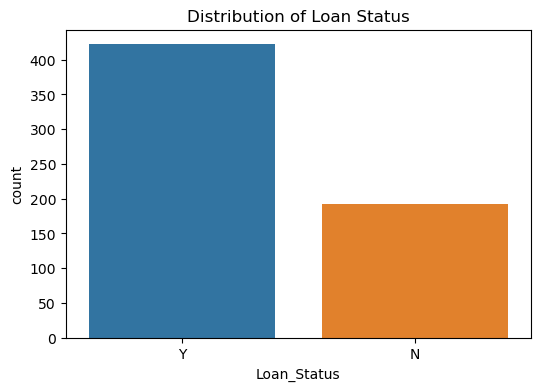

In [13]:
# 2. Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Distribution of Loan Status')
plt.show()

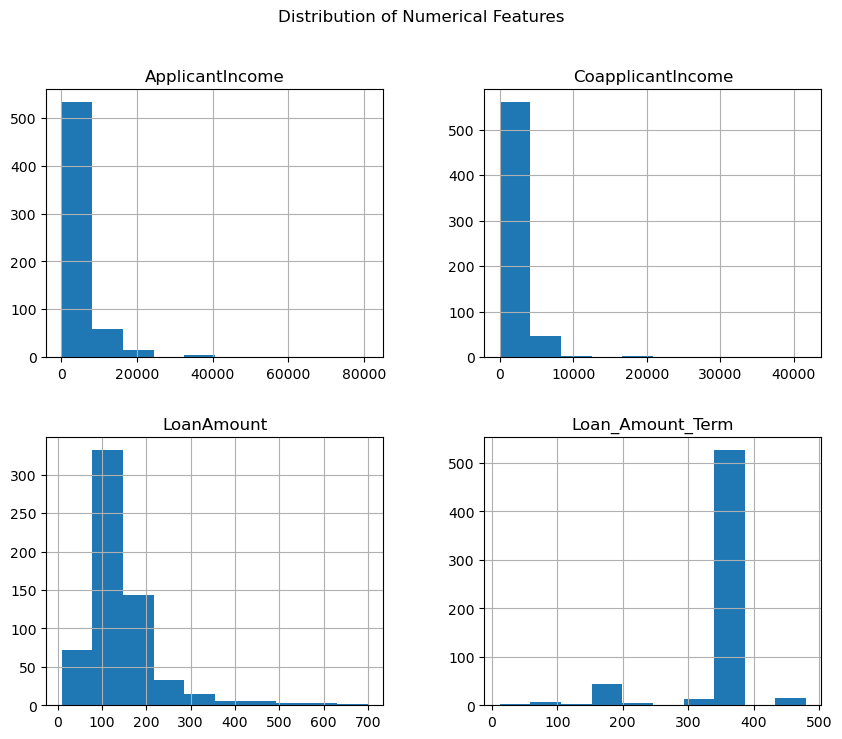

In [14]:
# 3. Distribution of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_data[numerical_features].hist(figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [15]:
def outliers_iqr(data, columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data[i] = data[i].clip(lower=low_lim, upper=up_lim)
        outliers = data[(data[i] < low_lim) | (data[i] > up_lim)] #Print if needed
    return data

columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_data = outliers_iqr(train_data, columns)
test_data = outliers_iqr(test_data, columns)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


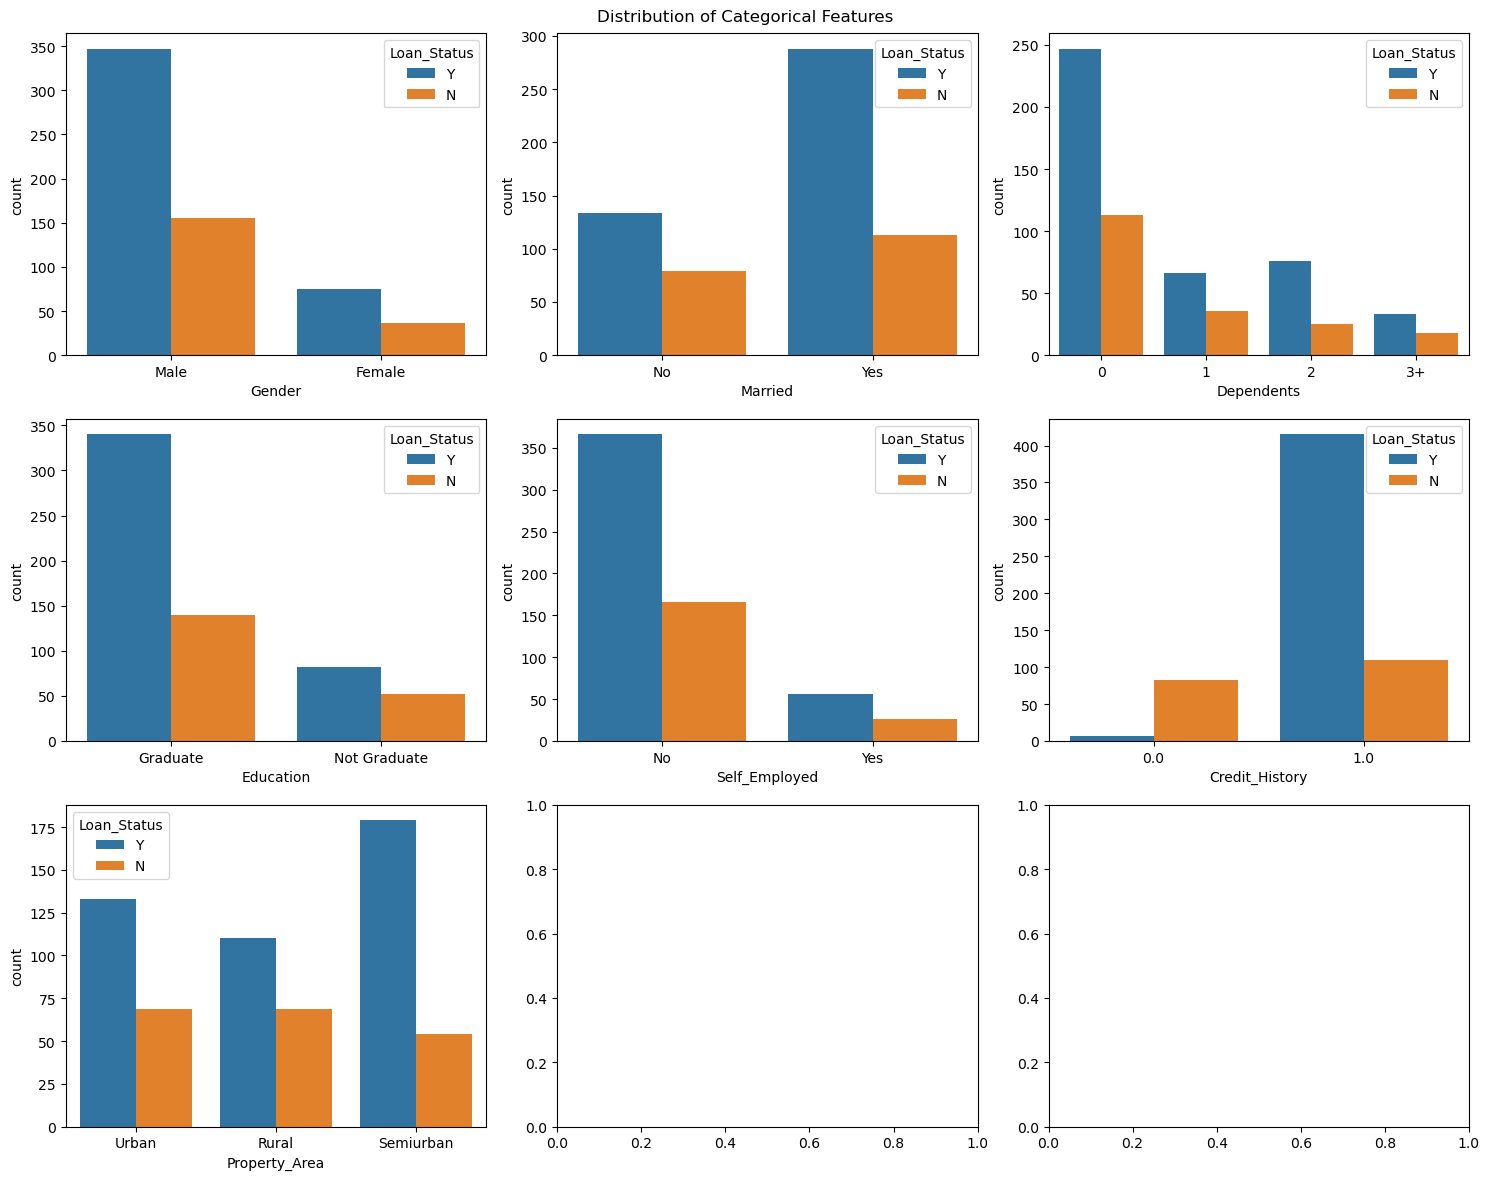

In [16]:
# 4. Distribution of categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
fig, axes = plt.subplots(3, 3, figsize=(15,12))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue = train_data['Loan_Status'], data=train_data, ax=axes[i])
plt.suptitle('Distribution of Categorical Features')
plt.tight_layout()
plt.show()

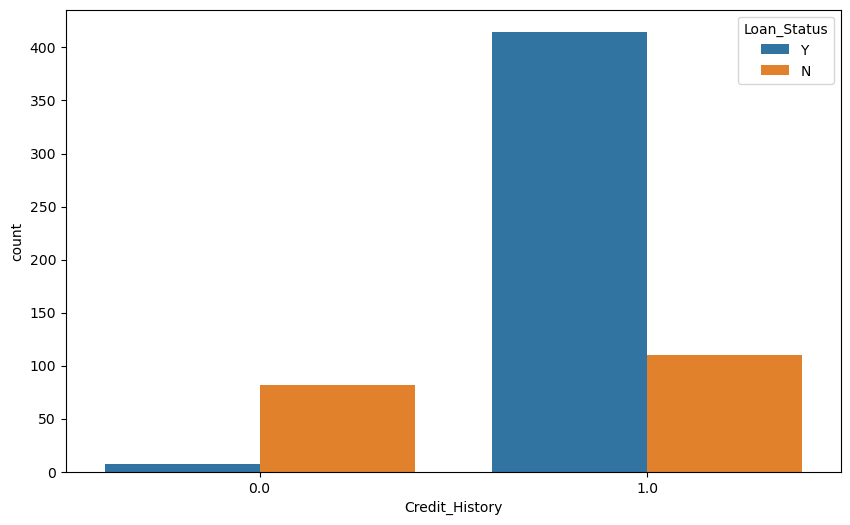

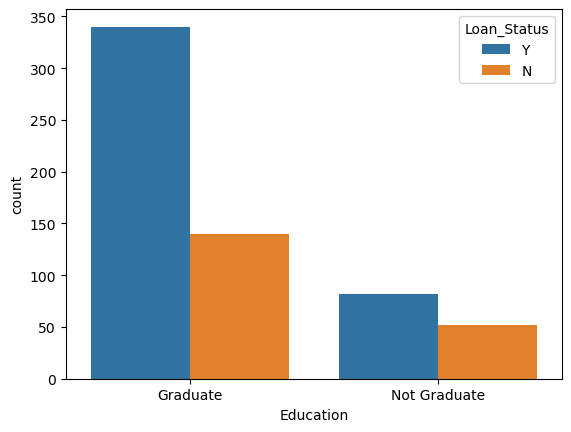

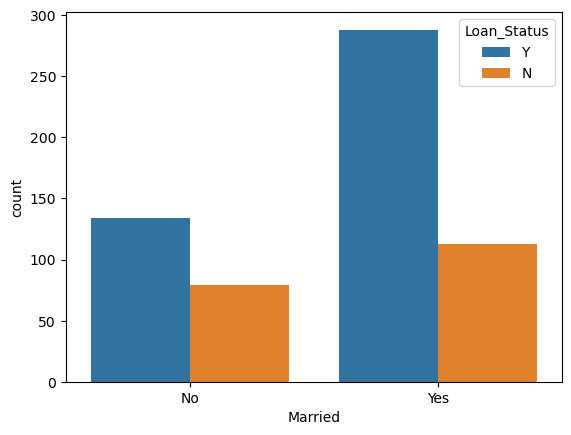

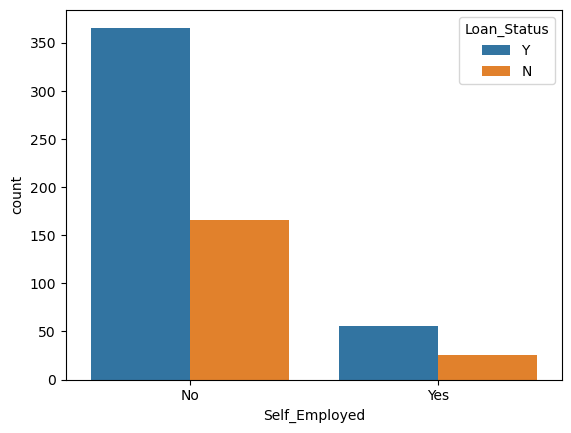

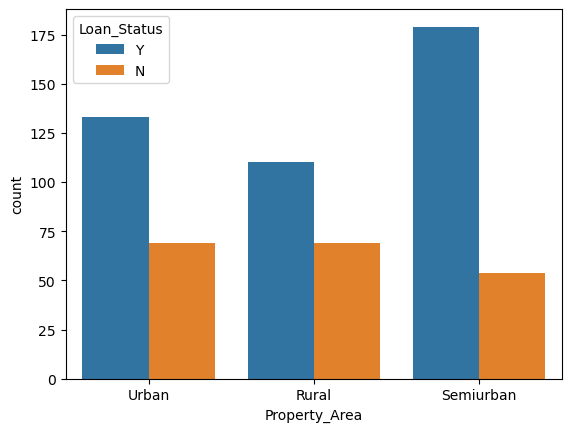

In [17]:
# 5. Relationship between features and target
plt.figure(figsize=(10, 6))
features = ['Credit_History', 'Education', 'Married', 'Self_Employed', 'Property_Area']
for value in features:
    sns.countplot(x= value, hue='Loan_Status', data=train_data)
    plt.show()

In [18]:
le = sk.LabelEncoder()
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])
train_data['Education'] = le.fit_transform(train_data['Education'])
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
train_data['Married'] = le.fit_transform(train_data['Married'])

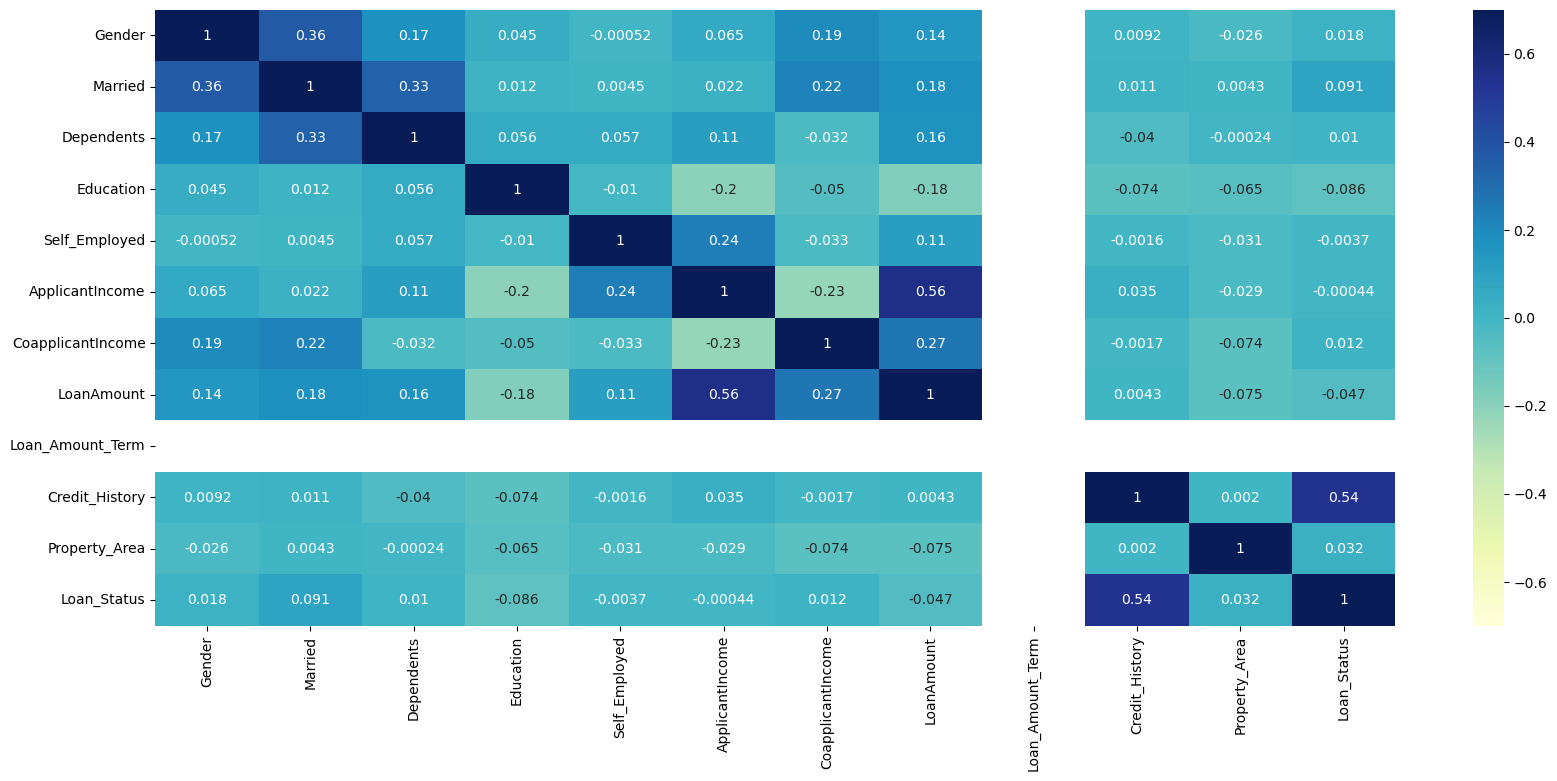

In [19]:
plt.subplots(figsize = (20,8))
sns.heatmap(train_data.select_dtypes(include = ['int64', 'float64', 'int32']).corr(), annot = True, vmin = -0.7, vmax = 0.7, cmap = 'YlGnBu')
plt.show()

In [20]:
train_data['Education'].value_counts()

Education
0    480
1    134
Name: count, dtype: int64

In [21]:
test_data['Gender'] = le.fit_transform(test_data['Gender'])
test_data['Dependents'] = le.fit_transform(test_data['Dependents'])
test_data['Education'] = le.fit_transform(test_data['Education'])
test_data['Self_Employed'] = le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area'] = le.fit_transform(test_data['Property_Area'])
test_data['Married'] = le.fit_transform(test_data['Married'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
x = train_data[['Credit_History', 'Education', 'ApplicantIncome','Married', 'Self_Employed', 'Property_Area']]
y = train_data['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [23]:
1. #Logistic Regression and Prediction

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.7727272727272727


In [24]:
y_pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [25]:
confusion_matrix(y_test, y_pred_log)

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [26]:
2. #Logistic Regression on Scaled data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)
x_train_scaled = scaler.fit_transform(x_train)
log_reg.fit(x_train_scaled, y_train)
y_pred_log_scaled = log_reg.predict(x_test_scaled)
confusion_matrix(y_test, y_pred_log_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_log_scaled))

Accuracy: 0.7727272727272727


In [27]:
confusion_matrix(y_test, y_pred_log_scaled)

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'],  
    'class_weight': [None, 'balanced'] 
}


log_reg = LogisticRegression(max_iter=1000, **param_grid)  
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params, max_iter=1000)  
best_log_reg.fit(x_train, y_train)
y_pred = best_log_reg.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.7727272727272727


In [35]:
log_reg = LogisticRegression(C=0.1, class_weight=None, penalty='l1', solver='liblinear', max_iter=1000)

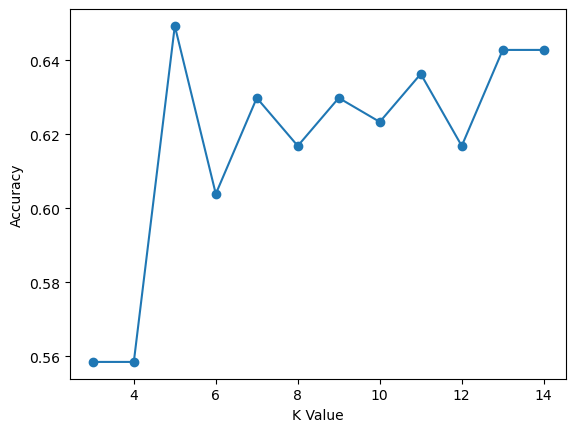

In [29]:
3. #k-NN Method

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15) #Testing best k
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred_knn = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    metric_k.append(accuracy)

#Plotting k versus accuracy to find best k
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

In [36]:
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(f"\nConfusion Matrix\n{confusion_matrix(y_test, y_pred_knn)}")

Accuracy: 0.6493506493506493

Confusion Matrix
[[ 7 47]
 [ 7 93]]


In [31]:
4. #SVM MODEL
#Basic iteration of kernals

from sklearn.svm import SVC
kernels = ['linear', 'rbf']
for value in kernels:
    sv_cl = SVC(kernel= value)
    sv_cl.fit(x_train, y_train)
    y_pred_svc = sv_cl.predict(x_test)
    print(f"\nKernel : { value }")
    print("Accuracy:", accuracy_score(y_test, y_pred_svc))


Kernel : linear
Accuracy: 0.7272727272727273

Kernel : rbf
Accuracy: 0.6493506493506493


In [46]:
sv_cl = SVC(kernel = 'linear')

In [38]:
5. #DECISION TREE

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 4)
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred_dt)}")

Accuracy: 0.7402597402597403
Confusion Matrix 
 [[28 26]
 [14 86]]


In [39]:
#Iteration for finding best Parameters in Decision Tree
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 10, 20]
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
max_features_values = [None, 'sqrt', 'log2']

dt_models = {}
dt_accuracies = {}

for criterion in criterion_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                for max_features in max_features_values:
                    dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features)
                    dt_model.fit(x_train, y_train)
                    y_pred = dt_model.predict(x_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    
                    key = (criterion, max_depth, min_samples_split, min_samples_leaf, max_features)
                    dt_models[key] = dt_model
                    dt_accuracies[key] = accuracy

print(f"Total number of Decision Tree models: {len(dt_models)}")
best_hyperparameters = max(dt_accuracies, key=dt_accuracies.get)
best_accuracy = dt_accuracies[best_hyperparameters]

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy with best hyperparameters: {best_accuracy:.4f}")

Total number of Decision Tree models: 72
Best hyperparameters: ('entropy', 10, 2, 1, 'sqrt')
Accuracy with best hyperparameters: 0.7532


In [40]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                                      min_samples_split=2,
                                                      min_samples_leaf=1,
                                                      max_features='sqrt')

In [41]:
6. #RANDOM FOREST

#Hyper Parameter Tuning
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred_rf)}")

Accuracy: 0.7402597402597403
Confusion Matrix 
 [[27 27]
 [13 87]]


In [42]:
#Iteration for best parameters in Random Forest Classifier

n_estimators_values = [10, 20]
max_depth_values = [None, 10, 20]
criterion_values = ['gini', 'entropy']
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 2]
max_features_values = [None, 'sqrt', 'log2']

rf_models = {}
rf_accuracies = {}
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for criterion in criterion_values:
            for min_samples_split in min_samples_split_values:
                for min_samples_leaf in min_samples_leaf_values:
                    for max_features in max_features_values:
                        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                                           criterion=criterion, min_samples_split=min_samples_split,
                                                           min_samples_leaf=min_samples_leaf, max_features=max_features)
                        rf_model.fit(x_train, y_train)
                        y_pred = rf_model.predict(x_test)
                        accuracy = accuracy_score(y_test, y_pred)
                        key = (n_estimators, max_depth, criterion, min_samples_split, min_samples_leaf, max_features)
                        rf_models[key] = rf_model
                        rf_accuracies[key] = accuracy

print(f"Total number of Random Forest models: {len(rf_models)}")
best_hyperparameters = max(rf_accuracies, key=rf_accuracies.get)
best_accuracy = rf_accuracies[best_hyperparameters]

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy with best hyperparameters: {best_accuracy:.4f}")

Total number of Random Forest models: 144
Best hyperparameters: (20, None, 'entropy', 2, 2, 'sqrt')
Accuracy with best hyperparameters: 0.7987


In [43]:
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=10,
                                                           criterion='entropy', min_samples_split=5,
                                                           min_samples_leaf=1, max_features='sqrt')

In [48]:
#Cross Validation of model using KFold and Stratified KFold


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
models = {
    'rf_clf': rf_clf,
    'dt_clf': dt_clf,
    'sv_cl': sv_cl,
    'classifier': classifier,
    'log_reg': log_reg
}
model_accuracy = {}
# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_score_kf = cross_val_score(model, x, y, cv=kfold_validator)
    print(f"KFold CV Scores:\n{cv_score_kf}")
    print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
    print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

    # Stratified KFold cross-validation
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_score_skf = cross_val_score(model, x, y, cv=stratified_cv)
    print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
    print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
    print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")
    
    model_accuracy[model_name] = {
        'KFold': {
            'mean_accuracy': cv_score_kf.mean(),
            'std_accuracy': cv_score_kf.std()
        },
        'StratifiedKFold': {
            'mean_accuracy': cv_score_skf.mean(),
            'std_accuracy': cv_score_skf.std()
        }
    }

print("Model Accuracies:")
for model_name, acc in model_accuracy.items():
    print(f"{model_name}:")
    print(f"KFold Mean Accuracy: {acc['KFold']['mean_accuracy']}, KFold Std: {acc['KFold']['std_accuracy']}")
    print(f"StratifiedKFold Mean Accuracy: {acc['StratifiedKFold']['mean_accuracy']}, StratifiedKFold Std: {acc['StratifiedKFold']['std_accuracy']}")
    print()

Model: rf_clf
KFold CV Scores:
[0.72580645 0.79032258 0.72580645 0.75806452 0.75409836 0.7704918
 0.75409836 0.75409836 0.75409836 0.85245902]
KFold Mean Accuracy: 0.7639344262295081
KFold Standard Deviation of Accuracy: 0.03450343524364593

Stratified KFold CV Scores:
[0.80645161 0.79032258 0.77419355 0.75806452 0.7704918  0.78688525
 0.75409836 0.67213115 0.75409836 0.80327869]
Stratified KFold Mean Accuracy: 0.7670015864621893
Stratified KFold Standard Deviation of Accuracy: 0.03645370380640716

Model: dt_clf
KFold CV Scores:
[0.70967742 0.74193548 0.62903226 0.72580645 0.72131148 0.67213115
 0.70491803 0.73770492 0.70491803 0.7704918 ]
KFold Mean Accuracy: 0.7117927022739292
KFold Standard Deviation of Accuracy: 0.03719399617111551

Stratified KFold CV Scores:
[0.72580645 0.69354839 0.74193548 0.75806452 0.68852459 0.80327869
 0.75409836 0.63934426 0.70491803 0.73770492]
Stratified KFold Mean Accuracy: 0.7247223691168694
Stratified KFold Standard Deviation of Accuracy: 0.0430992869

In [49]:
best_model_name = None
best_model_accuracy = 0.0

for model_name, acc in model_accuracy.items():
    mean_accuracy_kfold = acc['KFold']['mean_accuracy']
    mean_accuracy_skfold = acc['StratifiedKFold']['mean_accuracy']
    mean_accuracy = (mean_accuracy_kfold + mean_accuracy_skfold) / 2  #Average of KFold and StratifiedKFold

    if mean_accuracy > best_model_accuracy:
        best_model_accuracy = mean_accuracy
        best_model_name = model_name

print(f"Best Model: {best_model_name}")
print(f"Best Model Mean Accuracy: {best_model_accuracy}")

Best Model: log_reg
Best Model Mean Accuracy: 0.8094791115811739


**##THE BEST MODEL IS LOGISTIC REGRESSION WITH AN AVERAGE ACCURACY OF 0.8094

In [50]:
test = test_data[['Credit_History', 'Education', 'ApplicantIncome','Married', 'Self_Employed', 'Property_Area']]
log_reg.fit(x_test, y_test)
predictions = log_reg.predict(test)

In [51]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [61]:
status = ['Y' if pred == 1 else 'N' for pred in predictions]
submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': status})
submission.to_csv('submission.csv', index=False)

In [62]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [63]:
submission['Loan_Status'].value_counts()

Loan_Status
Y    308
N     59
Name: count, dtype: int64

In [64]:
submission.shape

(367, 2)

In [66]:
rf_clf.fit(x_test, y_test)
predictions = log_reg.predict(test)
status = ['Y' if pred == 1 else 'N' for pred in predictions]
loan_data = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': status})
loan_data.to_csv('loan_data.csv', index=False)